# Credit Card Fraud detection

The aim of this project is to predict fraudulent credit card transactions using machine learning models.It is crucial for credit card companies to identify fraudulent transactions so that customers are not charged for items that they did not purchase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

In [2]:
#pip install tensorflow

In [3]:
#pip install keras

In [4]:
#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

In [5]:
#load the data
credit= pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit.shape

(284807, 31)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#check if the data has hull values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null value spotted 

### Fraud and Genuine transactions cases 

In [9]:
fraud_cases=len(credit[credit['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [11]:
non_fraud_cases=len(credit[credit['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [13]:
fraud=credit[credit['Class']==1]

In [14]:
genuine=credit[credit['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## EDA

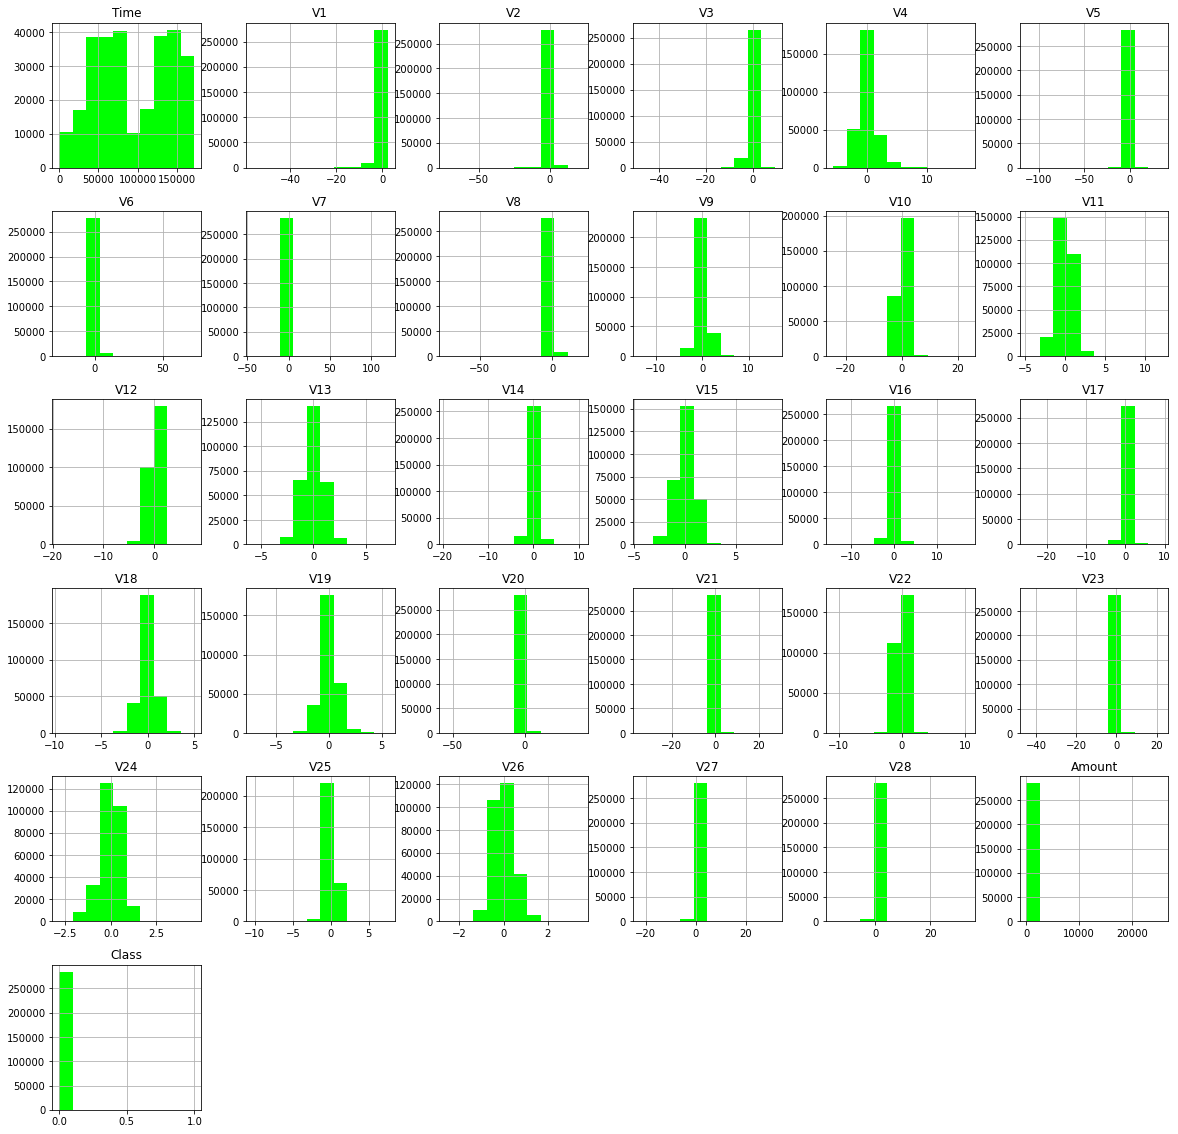

In [17]:
credit.hist(figsize=(20,20),color='lime')
plt.show()

In [18]:
#nymber of distinct categories or class
credit['Class'].nunique()

2

In [19]:
#number of instances per class
credit.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

O represents genuine transactions and 1 represents fradulant transactions

<AxesSubplot:>

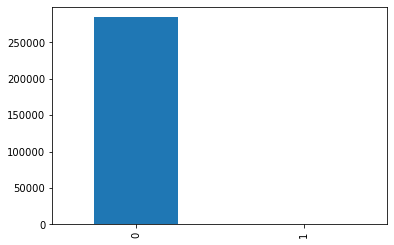

In [20]:
#visual representation of instances per class
credit.Class.value_counts().plot.bar()

We can clearly see how imbalance the data is. Only tiny portion of the total credit card transactions are fradulant.

The below plot after PCA gives a better visualization of the imbalance in the datasets

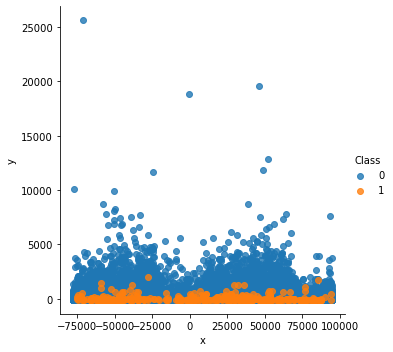

In [21]:
pca= PCA(n_components=2)
credit_2d= pd.DataFrame(pca.fit_transform(credit.iloc[:,0:30]))
credit_2d= pd.concat([credit_2d, credit['Class']], axis=1)
credit_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=credit_2d, fit_reg=False, hue='Class')

In [22]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## classification of genuine and fradulant transactions

In [23]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
credit['Amount'][credit['Class']==1]. describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
print("Genuine Transactions")
credit['Amount'][credit['Class']==0]. describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
print(fraud.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [26]:
(credit.Class.value_counts())/(credit.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

Less than 1 percent of the total transactions is fradulant. 

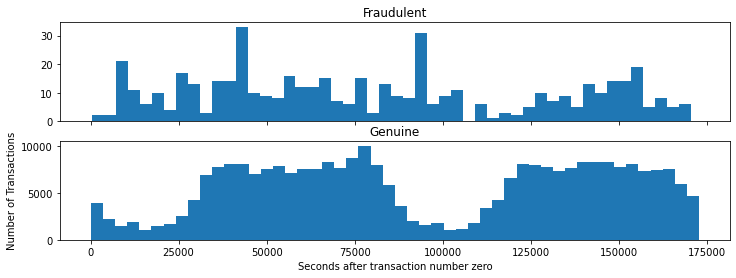

In [27]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(credit["Time"][credit["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(credit["Time"][credit["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given. Thus, we'll drop this feature.

### relationship between transactions with respect to amount

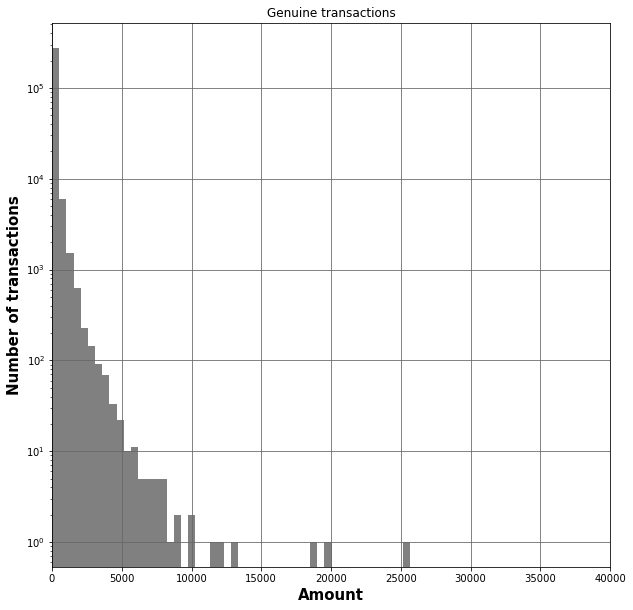

In [28]:
fig, axes1  = plt.subplots(sharex = True, figsize=(10,10))

bins = 50

axes1.hist(genuine.Amount, bins = bins, color = 'grey' )
axes1.set_title('Genuine transactions')

plt.xlabel('Amount', fontweight='bold', fontsize = '15')
plt.ylabel('Number of transactions', fontweight='bold', fontsize = '15')
plt.xlim(0,40000)
plt.yscale('log')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

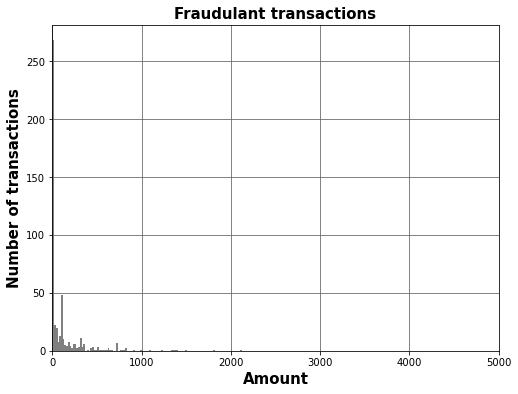

In [29]:
fig, axes1  = plt.subplots(sharex = True, figsize=(8,6) )

bins = 110

axes1.hist(fraud.Amount, bins = bins, color = 'Grey' )
axes1.set_title('Fraudulant transactions', fontweight='bold', fontsize = '15')

plt.xlabel('Amount', fontweight='bold', fontsize = '15',)
plt.ylabel('Number of transactions', fontweight='bold', fontsize = '15')
plt.xlim(0,5000)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

From the above graphs of fradulant transactions and genuine transactions we can clearly see that fradulant transacions are smaller amounts.

### Relationship between transactions type and time

In [30]:
#fradulant transactions
fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

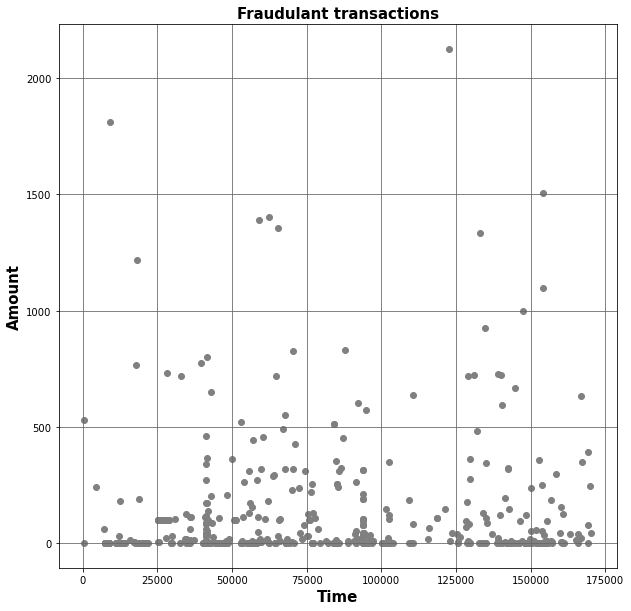

In [31]:
fig, axestime2  = plt.subplots(sharex = True, figsize=(10,10) )

axestime2.scatter(fraud.Time, fraud.Amount, color = 'Grey' )
axestime2.set_title('Fraudulant transactions', fontweight='bold', fontsize = '15' )

plt.xlabel('Time', fontweight='bold', fontsize = '15')
plt.ylabel('Amount', fontweight='bold', fontsize = '15')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [32]:
#genuine transactions
genuine.Time.describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

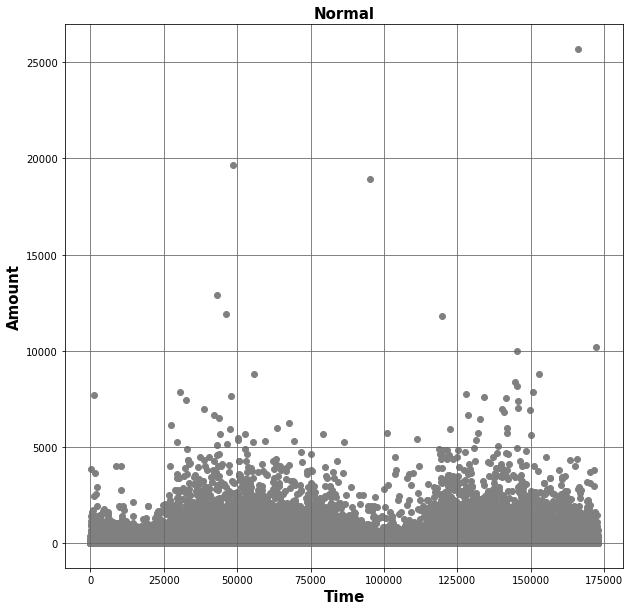

In [33]:
fig, axestime1  = plt.subplots(sharex = True, figsize=(10,10) )

axestime1.scatter(genuine.Time, genuine.Amount, color = 'Grey' )
axestime1.set_title('Normal', fontweight='bold', fontsize = '15' )

plt.xlabel('Time', fontweight='bold', fontsize = '15')
plt.ylabel('Amount', fontweight='bold', fontsize = '15')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

### Features of transactions based on class

In [34]:
from scipy.stats import norm
from matplotlib import gridspec

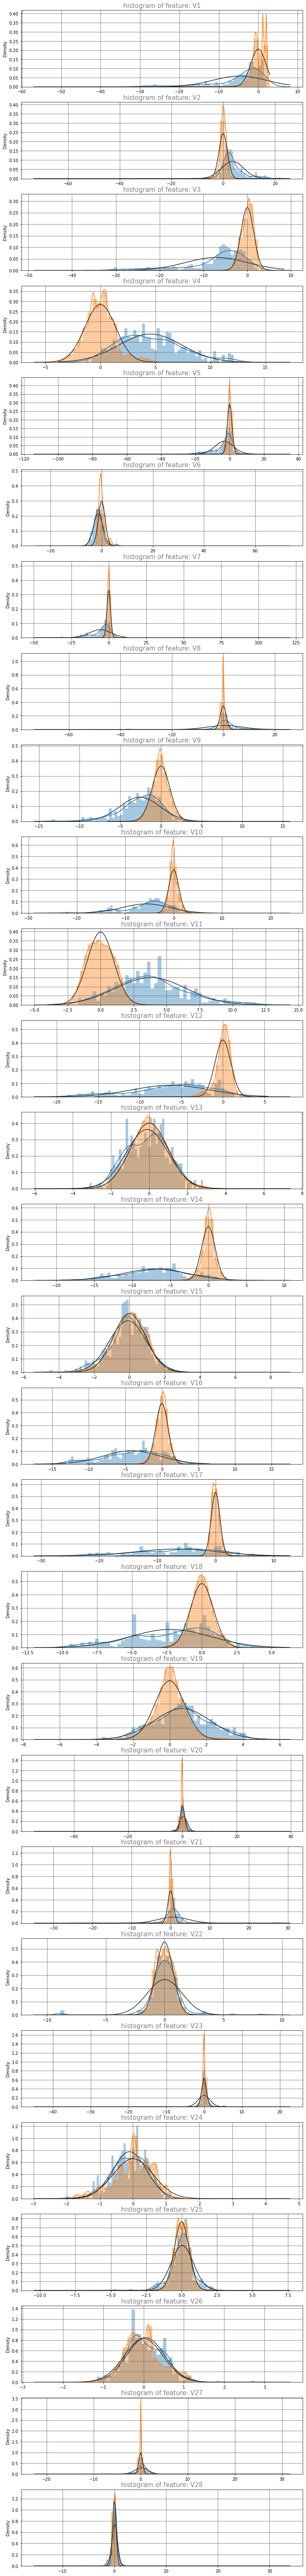

In [35]:
col_features = credit.iloc[:,1:29].columns
# col_features
bins = 50 

plt.figure( figsize = (12, 28 * 4))
gs = gridspec.GridSpec(28,1)

for count, elem in enumerate(credit[col_features]):
    ax = plt.subplot(gs[count])
    sns.distplot(credit[elem][credit.Class == 1], bins = bins, fit=norm )
    sns.distplot(credit[elem][credit.Class == 0], bins = bins, fit=norm)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(elem), fontsize = '15', color = "gray" )
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

### Data Processing

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler() 

credit['normalized_amount'] = scaler.fit_transform(credit['Amount'].values.reshape(-1,1))
credit['normalized_time'] = scaler.fit_transform(credit['Time'].values.reshape(-1,1))

In [38]:
credit.normalized_amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: normalized_amount, dtype: float64

In [39]:
credit.normalized_time.describe()

count    2.848070e+05
mean    -1.050379e-14
std      1.000002e+00
min     -1.996583e+00
25%     -8.552120e-01
50%     -2.131453e-01
75%      9.372174e-01
max      1.642058e+00
Name: normalized_time, dtype: float64

Droppping time and amount clumns since they dont provide valuable insights

In [72]:
credit = credit.drop(['Time','Amount'],axis =1)
credit.head()

KeyError: "['Time' 'Amount'] not found in axis"

In [73]:
#separating features and labels
xdata = credit.iloc[:,credit.columns != 'Class'] 
xdata.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount,normalized_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [74]:
print(xdata.shape)


(284807, 30)


In [75]:
print(xdata.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normalized_amount',
       'normalized_time'],
      dtype='object')


In [76]:
ydata = credit.iloc[:,credit.columns == 'Class']
ydata.head(5)

,Class
0,0
1,0
2,0
3,0
4,0


In [77]:
print(ydata.shape)
print(ydata.columns)

(284807, 1)
Index(['Class'], dtype='object')


### Oversampling

In [54]:
#!pip install imbalanced-learn

In [55]:
from sklearn.metrics import DistanceMetric

In [56]:
import sklearn.externals
import joblib

In [65]:
from imblearn.over_sampling import SMOTE

In [78]:
oversample = SMOTE(random_state= 42)
x_Sampled,y_Sampled = oversample.fit_resample(df,df1)

In [79]:
Source_data_no_fraud_count = len(credit[credit.Class==0])
Source_data_fraud_count = len(credit[credit.Class==1])
print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

Sampled_data_no_fraud_count = len(y_Sampled[y_Sampled==0])
Sampled_data_fraud_count = len(y_Sampled[y_Sampled==1])
print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

Percentage of fraud counts in original dataset:0.1727485630620034%
Percentage of fraud counts in the new data:50.0%


### Test- Train split 

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
x_Train , x_Test, y_Train, y_Test = train_test_split (xdata,ydata,test_size=0.2, random_state = 40)

print("Number of train dataset      : ", len(x_Train))
print("Number of test dataset       : ", len(x_Test))
print("Total number of transactions : ", len(x_Train) + len(x_Test))

#undersampled dataset

x_Train_Sampled, x_Test_Sampled, y_Train_Sampled, y_Test_Sampled = train_test_split (x_Sampled, y_Sampled, test_size = 0.2, random_state = 40)
print("\n")
print("Number of train dataset      : ", len(x_Train_Sampled))
print("Number of test dataset       : ", len(x_Test_Sampled))
print("Total number of transactions : ", len(x_Train_Sampled) + len(x_Test_Sampled))


x_train_sampled_data = pd.DataFrame(x_Train_Sampled)
y_train_sampled_data = pd.DataFrame(y_Train_Sampled)
x_test_sampled_data  = pd.DataFrame(x_Test_Sampled)
y_test_sampled_data  = pd.DataFrame(y_Test_Sampled)

Number of train dataset      :  227845
Number of test dataset       :  56962
Total number of transactions :  284807


Number of train dataset      :  454904
Number of test dataset       :  113726
Total number of transactions :  568630


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [91]:
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [92]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(x_train_sampled_data, y_train_sampled_data)
yPred=lr.predict(x_test_sampled_data)
scores = cross_val_score(lr, y_test_sampled_data, yPred, cv=10, scoring='accuracy')
print(scores)

[0.95 0.95 0.95 0.95 0.95 0.94 0.95 0.95 0.95 0.95]


In [86]:
print(scores.mean())

0.947435047815359


In [87]:
y_predicted =  np.array(lr.predict(x_test_sampled_data))
y_right = np.array(y_test_sampled_data)

cnf = confusion_matrix(y_right, y_predicted )
np.set_printoptions(precision=2)
cnf

array([[55612,  1462],
       [ 4516, 52136]], dtype=int64)

In [88]:
print ('Accuracy Score :',accuracy_score(y_right, y_predicted)) 

Accuracy Score : 0.9474350632221303


In [89]:
print(classification_report(y_right, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     57074
           1       0.97      0.92      0.95     56652

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [90]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresolds = precision_recall_curve(y_right, y_predicted)

In [93]:
precision

array([0.5 , 0.97, 1.  ])

In [94]:
recall

array([1.  , 0.92, 0.  ])

In [98]:
thresolds

array([0, 1], dtype=int64)

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greys):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [103]:
import itertools

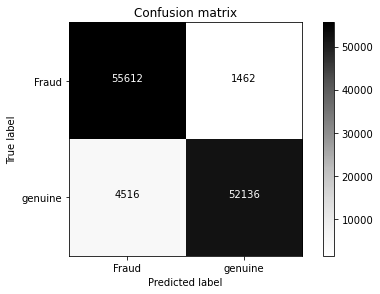

In [104]:
class_names = ['Fraud','genuine']
plt.figure()
plot_confusion_matrix(cnf,classes=class_names,title='Confusion matrix')
plt.show()